<a href="https://colab.research.google.com/github/ai7dnn/2021-AI-for-everyone/blob/main/code/3_3_my_iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 불러오기

In [19]:
# 라이브러리 환경
import pandas as pd
import numpy as np

In [20]:
# skleran 데이터셋에서 iris 데이터셋 로딩
from sklearn import datasets
iris = datasets.load_iris()

# iris 데이터셋은 딕셔너리 형태이므로, key 값을 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
# DESCR 키를 이용하여 데이터셋 설명(Description) 출력
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
# target 속성의 데이터셋 크기
print("데이터셋 크기:", iris['target'].shape)

# target 속성의 데이터셋 내용
print("데이터셋 내용: \n", iris['target'])

데이터셋 크기: (150,)
데이터셋 내용: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:
# data 속성의 데이터셋 크기
print("데이터셋 크기:", iris['data'].shape)
# data 속성의 데이터셋 내용 (첫 7개 행을 추출)
print("데이터셋 내용: \n", iris['data'][:7, :])

데이터셋 크기: (150, 4)
데이터셋 내용: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]


In [24]:
# data 속성을 판다스 데이터프레임으로 변환
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("데이터프레임의 형태:", df.shape)
df.head()

데이터프레임의 형태: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
# 열(column) 이름을 간결하게 변경
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [26]:
# Target 열 추가
df['Target'] = iris['target']
print('데이터셋의 크기: ', df.shape)
df.head()

데이터셋의 크기:  (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Baseline 모델 학습

#### 학습용-테스트 데이터셋 분리하기

In [27]:
from sklearn.model_selection import train_test_split

X_data = df.loc[:, 'sepal_length':'petal_width']
y_data = df.loc[:, 'Target']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


### KNN

In [28]:
# 모델 학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
# 예측
y_knn_pred = knn.predict(X_test)
print("예측값: ", y_knn_pred[:5])

예측값:  [0 1 1 2 1]


In [30]:
# 성능 평가
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print("Accuracy: %.4f" % knn_acc)

Accuracy: 1.0000


## 전 소스

In [36]:
# KNN을 적용한 붓꽃 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 1. 데이터 준비와 전처리
iris = datasets.load_iris()

# 데이터프레임 생성과 열 지정
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['Target'] = iris['target']

# 중복 데이터 제거
df = df.drop_duplicates()

# 2. 학습 데이터, 테스트 데이터 준비
X_data = df.loc[:, 'sepal_length':'petal_width']
y_data = df.loc[:, 'Target']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=20)

# 3. 모델 학습
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# 4. 예측
y_knn_pred = knn.predict(X_test)
print("예측값: ", y_knn_pred[:10])
print("정답 : ", y_test[:10].values)

# 5. 성능 평가
knn_acc = accuracy_score(y_test, y_knn_pred)
print("Accuracy: %.4f" % knn_acc)

예측값:  [0 1 1 2 1 1 2 0 2 0]
정답 :  [0 1 1 2 1 1 2 0 2 0]
Accuracy: 1.0000


### SVM

In [31]:
# 모델 학습
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [32]:
# 예측
y_svc_pred = svc.predict(X_test)
print("예측값: ", y_svc_pred[:5])
# 성능 평가
svc_acc = accuracy_score(y_test, y_svc_pred)
print("Accuracy: %.4f" % svc_acc)

예측값:  [0 1 1 2 1]
Accuracy: 1.0000


## SVM 전 소스

In [6]:
# KNN을 적용한 붓꽃 분류
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 1. 데이터 준비와 전처리
iris = datasets.load_iris()

# 데이터프레임 생성과 열 지정
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['Target'] = iris['target']

# 중복 데이터 제거
df = df.drop_duplicates()

# 2. 학습 데이터, 테스트 데이터 준비
X_data = df.loc[:, 'sepal_length':'petal_width']
y_data = df.loc[:, 'Target']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=20)


# 3. 모델 학습
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

# 4. 예측
y_svc_pred = svc.predict(X_test)
print("예측값: ", y_svc_pred[:5])

# 5. 성능 평가
svc_acc = accuracy_score(y_test, y_svc_pred)
print("Accuracy: %.4f" % svc_acc)

예측값:  [0 1 1 2 1]
Accuracy: 1.0000


#colab matplotlib 한글 지원

1. 폰트 설치 후 폰트 재구성
    - 다음은 한번 실행하고 다시 '런타임 다시 시작' 후 다음 셀 실행
    - 새로운 파일마다 이 셀은 실행 필요

    - APT(Advanced Packaging Tool)로 폰트 설치 실행

`!apt -qq -y install fonts-nanum`

`import matplotlib as mpl`

    - 폰트 매니저의 메서드로 다시 폰트를 구성
    - 폰트 구성 후 '다시 실행'해야 재설정된 폰트가 반영
`mpl.font_manager._rebuild()`

2. 이후 반드시 [런타임/런타임 다시시작(ctr + m .)] 실행 한 후 위 명령은 필요 없이

3. 폰트 지정 후 사용
    - 한글 폰트를 선명하도록 하는 파워명령어

`%config InlineBackend.figure_format = 'retina'`

`import matplotlib as mpl`

`import matplotlib.pyplot as plt`

    - 한글 폰트 지원
`plt.rc('font', family='NanumBarunGothic')`

    - 음수 부호 지원
`mpl.rcParams['axes.unicode_minus'] = False`

4. 샘플 출력 

`import numpy as np`

`import matplotlib.pyplot as plt`

`plt.plot(range(-20, 80), np.random.randn(100).cumsum(), 'r--')`

`plt.title('한글 점검');`

In [40]:
# colab matplotlib 한글 지원

# 1. 폰트 설치 후 폰트 재구성
# 다음은 한번 실행하고 다시 '런타임 다시 시작' 후 다음 셀 실행
# 새로운 파일마다 이 셀은 실행 필요

# APT(Advanced Packaging Tool)로 폰트 설치 실행
!apt -qq -y install fonts-nanum

import matplotlib as mpl
# 폰트 매니저의 메서드로 다시 폰트를 구성
# 폰트 구성 후 '다시 실행'해야 재설정된 폰트가 반영
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


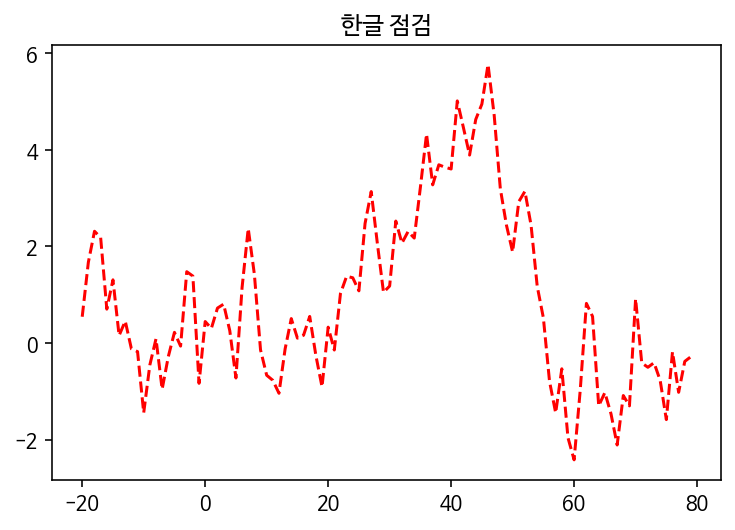

In [1]:
# 한글 폰트를 선명하도록 하는 파워명령어
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
import matplotlib.pyplot as plt

# 한글 폰트 지원
plt.rc('font', family='NanumBarunGothic') 
# 음수 부호 지원
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
import matplotlib.pyplot as plt

plt.plot(range(-20, 80), np.random.randn(100).cumsum(), 'r--')
plt.title('한글 점검');

[소스 참조](https://datascienceschool.net/03%20machine%20learning/13.03%20%EC%BB%A4%EB%84%90%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0.html)

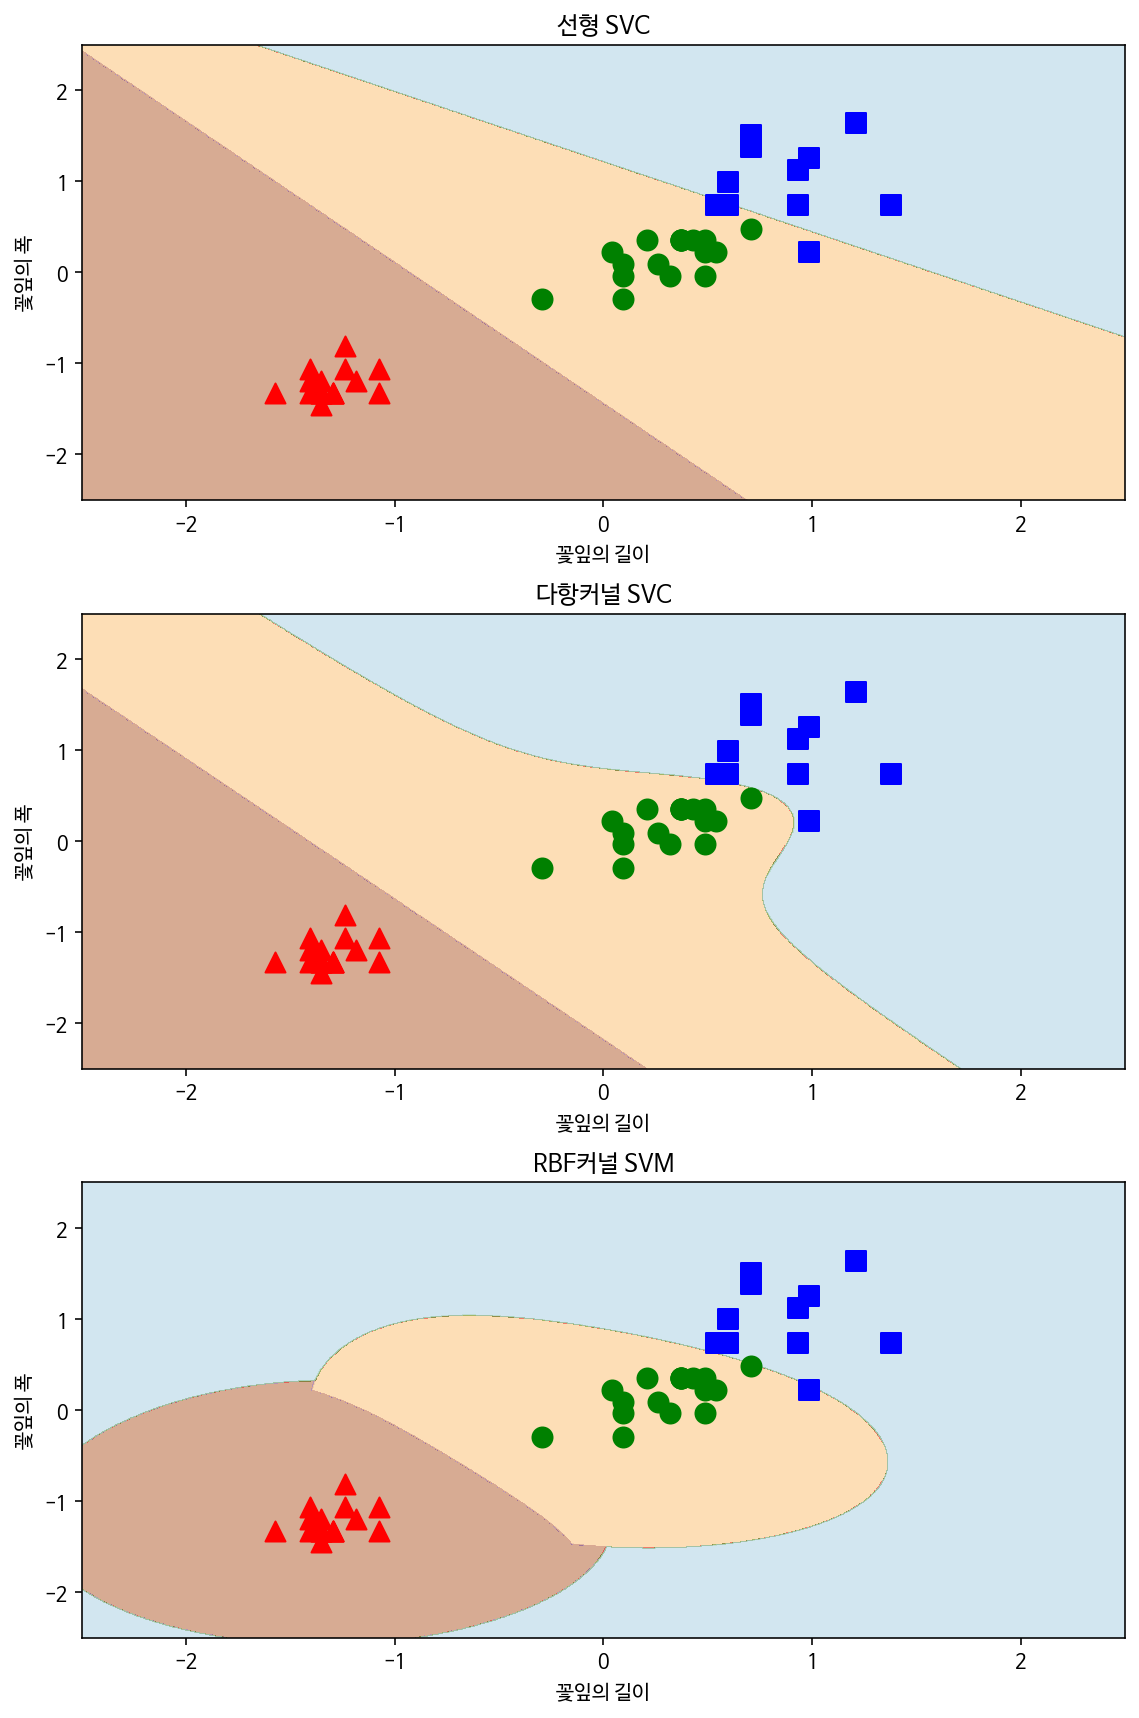

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("꽃잎의 길이")
    plt.ylabel("꽃잎의 폭")
    plt.title(title)


model1 = SVC(kernel='linear').fit(X_test_std, y_test)
model2 = SVC(kernel='poly', random_state=0,
             gamma=10, C=1.0).fit(X_test_std, y_test)
model3 = SVC(kernel='rbf', random_state=0, gamma=1,
             C=1.0).fit(X_test_std, y_test)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_test_std, y_test, model1, "선형 SVC")
plt.subplot(312)
plot_iris(X_test_std, y_test, model2, "다항커널 SVC")
plt.subplot(313)
plot_iris(X_test_std, y_test, model3, "RBF커널 SVM")
plt.tight_layout()
plt.show()